## Predicting housing price using machine learning
we are going to take a following approch

1. Problem Definition
2. Data
3. Features
4. Modelling
5. Evaliation
6. Experimentation 

In [179]:
# import all tools we need

# Regular Exploratory and Data analysis (EDA) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# model for scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [180]:
# load dataset
df = pd.read_csv('../../../dataset/Housing-Price.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [181]:
# check null column
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [182]:
# check for duplicate 
df.duplicated().sum()

0

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [184]:
# create X and y
X = df.drop('price', axis=1)
y = df['price']

# split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor()
model.fit(X_train,  y_train)

model.score(X_test, y_test)


ValueError: could not convert string to float: 'yes'

In [185]:
# get all numerical col
num_col = [ col for col in X_train.columns if X_train[col].dtypes != 'object' ]

# get categorycal col
cat_col = [ col for col in X_train.columns if X_train[col].dtypes == "object"]

# Turn into category to number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hots = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

transformer = ColumnTransformer([('one_hot', one_hots, cat_col)], remainder='passthrough')

transform_X = transformer.fit_transform(X)

transform_X


array([[0., 1., 1., ..., 2., 3., 2.],
       [0., 1., 1., ..., 4., 4., 3.],
       [0., 1., 1., ..., 2., 2., 2.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 2., 0.]])

In [186]:
# setup random seed
np.random.seed(42)
# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(transform_X, y, test_size=0.2, random_state=42)

# train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.6102554180783775

In [215]:
# let try different type of model together
models = {
    "Random Forest": RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "Xgboost": XGBRegressor(),
    "ride": Ridge(),
    "lasso": Lasso()
}


def model_and_score(model, X_train, X_test, y_train, y_test):
    # setup random seed
    np.random.seed(42)

    # create dict to keep model score
    model_score = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    
    return model_score

model_score = model_and_score(model, X_train, X_test, y_train, y_test)

In [216]:
model_score

{'Random Forest': 0.6102554180783775,
 'Linear Regression': 0.6529242642153192,
 'Xgboost': 0.5959857702255249,
 'ride': 0.6528547860166135,
 'lasso': 0.6529234894396977}

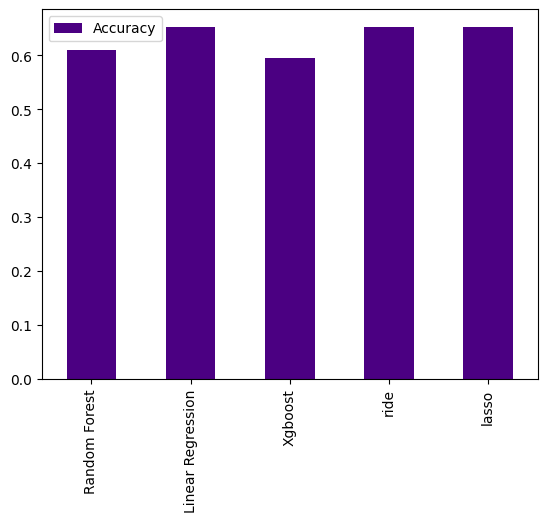

In [189]:
model_compare = pd.DataFrame(model_score, index=['Accuracy'])
# Plotting
ax = model_compare.T.plot(kind="bar", color=['indigo'])

# colors = ['orange', 'blue', 'indigo', 'cyan']
# for i, bar in enumerate(ax.patches):
#     bar.set_color(colors[i % len(colors)]) 


## So for the chart we can see that linear regression is the best model for the dataset
## Now it's time to develop model performance with hyperparameter tuning


In [211]:
from sklearn.model_selection import GridSearchCV

# hyperparameter tuning for lasso
param_grid = {'alpha': [10, 100, 200, 300]}

rs_lasso = RandomizedSearchCV(
    estimator = Lasso(),
    param_distributions=param_grid,
    cv=5,
    n_iter=10,
    verbose=2
)
rs_lasso.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ..........................................alpha=100; total time=   0.0s
[CV] END ..........................................alpha=100; total time=   0.0s
[CV] END ..........................................alpha=100; total time=   0.0s
[CV] END ..........................................alpha=100; total time=   0.0s
[CV] END ..........................................alpha=100; total time=   0.0s
[CV] END ..........................................alpha=200; total time=   0.0s
[CV] END ........................................

D:\machine-learning\machine-learning-project\regression-project\housing-price-project\env\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': [10, 100, 200, 300]},
                   verbose=2)

In [212]:
best_model = rs_lasso.best_estimator_
best_model

Lasso(alpha=300)

In [213]:
ls_score = rs_lasso.score(X_test, y_test)
ls_y_pred = rs_lasso.predict(X_test)

ls_r2_score = r2_score(y_test, y_pred)

ls_r2_score

0.6034334005776417

In [193]:
from sklearn.model_selection import RandomizedSearchCV
# Set different hyperparameter for randomforestregression
random_para = {
    "n_estimators": np.arange(100, 1000, 50),
    "max_depth": [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

rs_random_reg = RandomizedSearchCV(
        estimator=RandomForestRegressor(),
        param_distributions=random_para,
        n_iter=10,
        cv=5,
        verbose=2
    )

rs_random_reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=450; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=450; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=450

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=2)

In [169]:
random_best_model = rs_random_reg.best_params_
random_best_model

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10}

In [195]:
rs_y_pred = rs_random_reg.predict(X_test)
r2_score(y_test, y_pred)

0.6034334005776417